forward pass [-19.41728375]
dactivation -0.318316127009465
weight [0.5]
input [0.36336775 0.75517886]
forward pass [-46.12051909]
dactivation -0.7570637228430832
weight [0.49955081681556124]
input [-0.51211518 -1.17585563]
forward pass [-75.13722985]
dactivation -1.244342677066875
weight [0.5031270371376418]
input [-1.46309624  0.84398891]
forward pass [-80.67127845]
dactivation -1.3982076725563364
weight [0.5304859014427757]
input [-1.64243569  1.04132249]
forward pass [-52.38842732]
dactivation -0.9549545106394051
weight [0.5675376740866778]
input [-0.71444909  0.85827536]
forward pass [16.1812007]
dactivation 0.3190612462300788
weight [0.5746862466683264]
input [1.52873798 1.83729493]
forward pass [-78.08764512]
dactivation -1.4514350951885833
weight [0.573107734793305]
input [-1.55454033 -0.00424778]
forward pass [24.15433233]
dactivation 0.5047330932347805
weight [0.6083457903954744]
input [ 1.78831997 -0.94959256]
forward pass [-67.16853637]
dactivation -1.3076046921472642
weight

C:\Users\Jason_yj4bjfp\AppData\Local\Temp\ipykernel_8896\3141906316.py:66: RuntimeWarning: overflow encountered in scalar multiply
  adj_weights = [weights[x]-learning_rate*(self.forward_pass(X[k])[0]-y[k])*self.dactivation(n, X[k])*X[k][x] for x in range(len(weights))]
C:\Users\Jason_yj4bjfp\AppData\Local\Temp\ipykernel_8896\3141906316.py:67: RuntimeWarning: overflow encountered in scalar multiply
  adj_weights.append(n.get_weights()[-1:][0]-learning_rate*(self.forward_pass(X[k])[0]-y[k])*self.dactivation(n, X[k]))
c:\Users\Jason_yj4bjfp\VSProjects\Custom_NN\Neuron.py:52: RuntimeWarning: invalid value encountered in scalar add
  output = output + self.weights[x]*input[x]
c:\Users\Jason_yj4bjfp\VSProjects\Custom_NN\Neuron.py:46: RuntimeWarning: invalid value encountered in scalar add
  output = output + self.weights[x]*input[x]


forward pass [nan]
dactivation nan
weight [nan]
input [0.45044699 0.94620683]
forward pass [nan]
dactivation nan
weight [nan]
input [-1.80868502  0.60517752]
forward pass [nan]
dactivation nan
weight [nan]
input [ 1.426169   -0.26922537]
forward pass [nan]
dactivation nan
weight [nan]
input [1.0000257  0.31457015]
forward pass [nan]
dactivation nan
weight [nan]
input [ 0.53242748 -1.20162944]
forward pass [nan]
dactivation nan
weight [nan]
input [ 1.47650183 -0.87438477]
forward pass [nan]
dactivation nan
weight [nan]
input [1.92255975 1.00398921]
forward pass [nan]
dactivation nan
weight [nan]
input [-1.03334355 -0.86901715]
forward pass [nan]
dactivation nan
weight [nan]
input [0.43488138 1.76271316]
forward pass [nan]
dactivation nan
weight [nan]
input [1.64388286 1.69859792]
forward pass [nan]
dactivation nan
weight [nan]
input [0.13576976 0.10537494]
forward pass [nan]
dactivation nan
weight [nan]
input [-0.56615598  1.62757462]
forward pass [nan]
dactivation nan
weight [nan]
inpu

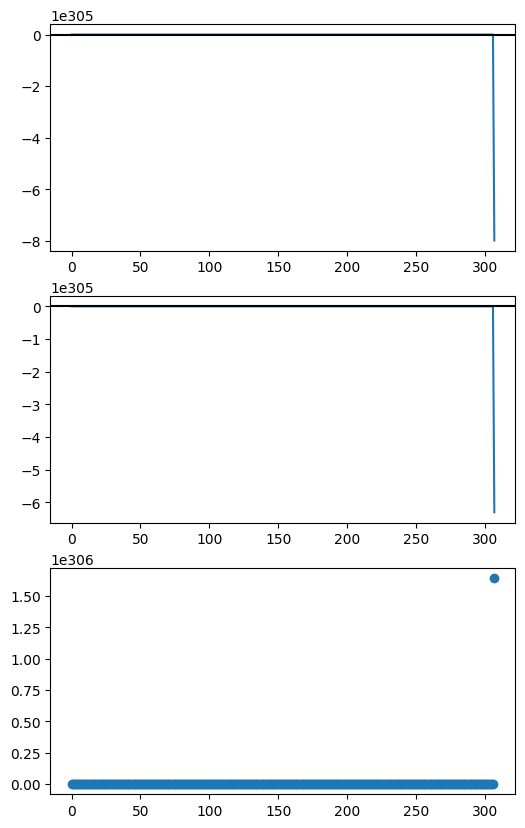

In [86]:
import numpy as np
import matplotlib as plt
from Neuron import *
import time
import matplotlib.pyplot as plt

class Output_Layer:
    def __init__(self, input_shape, output_shape, activation_func=none):
        neuron_layer = np.array([])
        for x in range(output_shape):
            neuron_layer = np.append(neuron_layer,Perceptron(n_of_weights=input_shape, step=activation_func, activation=activation_func))
        self.neurons = neuron_layer
        
    def get_neuron(self, n):
        return self.neurons[n]
    
    def get_neurons(self):
        return self.neurons
    
    def set_neurons(self, adj_neurons):
        self.neurons = adj_neurons
    
    def forward_pass(self, X):
        output = np.array([])
        for neuron in self.neurons:
            output = np.append(output,neuron.step_pass(X))
        return output
    
    def relu(self, input):
        if input>0:
            return input
        else:
            return 0
        
    def drelu(self, input):
        if input>0:
            return 1
        else:
            return 0

    def sigmoid(self, input):
        return 1/(1+np.e**(-input))

    def dsigmoid(self, input):
        return self.sigmoid(input)*(1-self.sigmoid(input))
    
    def dactivation(self, neuron, input):
        activation = neuron.get_activation()
        if activation=='sigmoid':
            return dsigmoid(neuron.raw_pass(input))
        elif activation=='relu':
            return drelu(neuron.raw_pass(input))
        else:
            return neuron.raw_pass(input)
    
    def fit(self, X, y, learning_rate):
        weight_change = [[w] for w in self.get_neurons()[0].get_weights()]
        error = [0]
        neurons = self.get_neurons()
        self.get_neurons()[0].change_weights([0.5,-0.5])
        for k in range(len(X)):
            for n in neurons:
                weights = n.get_weights()[:-1]
                print("forward pass",(self.forward_pass(X[k])-y[k]))
                print("dactivation",self.dactivation(n, X[k]))
                adj_weights = [weights[x]-learning_rate*(self.forward_pass(X[k])[0]-y[k])*self.dactivation(n, X[k])*X[k][x] for x in range(len(weights))]
                adj_weights.append(n.get_weights()[-1:][0]-learning_rate*(self.forward_pass(X[k])[0]-y[k])*self.dactivation(n, X[k]))
                n.change_weights(adj_weights)
                for x in range(len(adj_weights)):
                    weight_change[x].append(adj_weights[x])
                print("weight",weights)
                print("input",X[k])
            error.append(y[k]-n.step_pass(X[k]))
            self.set_neurons(neurons)
        return weight_change, error
    
    
## testing

start = time.time()

layer = Output_Layer(1, 1)

X = np.array([np.random.uniform(-2,2,2) for x in range(2000)])
y = [-30*x[0]+30 for x in X]

change, err = layer.fit(X,y, learning_rate=0.0002)

print(layer.get_neurons()[0].get_weights())

end = time.time()
print(end-start)

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 10))

ycoef = [-30,30]

for x in range(len(change)):
    axes[x].plot(change[x])
    axes[x].axhline(y=ycoef[x],color='black')
axes[2].scatter(range(len(err)),err)
plt.show()

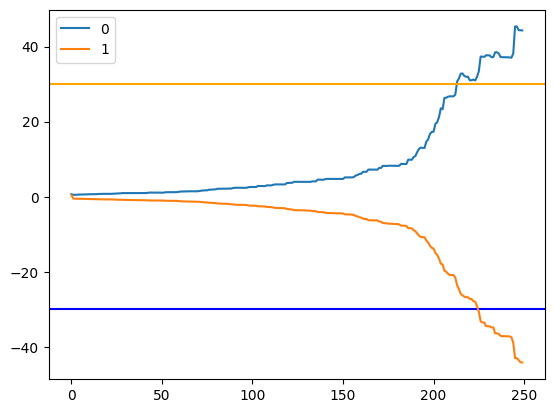

In [87]:
a = 0
n = 250
plt.plot(change[0][a:n],label='0')
plt.axhline(y=-30, color='blue')
plt.plot(change[1][a:n],label='1')
plt.axhline(y=30, color='orange')
# plt.plot(change[2][a:n],label='2')
# plt.axhline(y=30, color='green')
plt.legend()

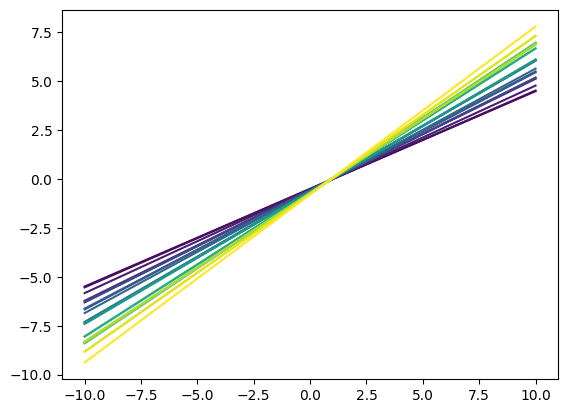

In [96]:
cmap = plt.cm.viridis
colors = np.linspace(0, 1, 25)

# Plot the lines with the color gradient
for x in range(25):
    plt.plot([-10, 10], [change[0][x+1] * -10 + change[1][x+1], change[0][x+1] * 10 + change[1][x+1]], color=cmap(colors[x]))